<a href="https://colab.research.google.com/github/lokrajs/colabExercises/blob/main/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


In [ ]:
!wget https://lazyprogrammer.me/course_files/exercises/boston.txt

--2021-06-01 14:56:39--  https://lazyprogrammer.me/course_files/exercises/boston.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘boston.txt’

boston.txt              [ <=>                ]  50.05K  --.-KB/s    in 0.004s  

2021-06-01 14:56:40 (11.6 MB/s) - ‘boston.txt’ saved [51256]



In [ ]:
boston_file = open('boston.txt')
columns = []
inds = []
df = None
line_to_done = None
for p, line in enumerate(boston_file):
  if(p <= 20 and p >=7): 
    inds.append(p)
    columns.append(line.split()[0])
  elif (p==21):
    df = pd.DataFrame(columns=columns)
  elif (p >= 22):
    if(p%2==1):
      df2 = pd.DataFrame(data=(np.array((line_to_done + line).split())).reshape(1,-1),columns=columns)
      df = df.append(df2,ignore_index=True)
    else:
      line_to_done = line
print(df)



        CRIM     ZN   INDUS CHAS     NOX  ...    TAX PTRATIO       B LSTAT   MEDV
0    0.00632  18.00   2.310    0  0.5380  ...  296.0   15.30  396.90  4.98  24.00
1    0.02731   0.00   7.070    0  0.4690  ...  242.0   17.80  396.90  9.14  21.60
2    0.02729   0.00   7.070    0  0.4690  ...  242.0   17.80  392.83  4.03  34.70
3    0.03237   0.00   2.180    0  0.4580  ...  222.0   18.70  394.63  2.94  33.40
4    0.06905   0.00   2.180    0  0.4580  ...  222.0   18.70  396.90  5.33  36.20
..       ...    ...     ...  ...     ...  ...    ...     ...     ...   ...    ...
501  0.06263   0.00  11.930    0  0.5730  ...  273.0   21.00  391.99  9.67  22.40
502  0.04527   0.00  11.930    0  0.5730  ...  273.0   21.00  396.90  9.08  20.60
503  0.06076   0.00  11.930    0  0.5730  ...  273.0   21.00  396.90  5.64  23.90
504  0.10959   0.00  11.930    0  0.5730  ...  273.0   21.00  393.45  6.48  22.00
505  0.04741   0.00  11.930    0  0.5730  ...  273.0   21.00  396.90  7.88  11.90

[506 rows x 14 

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Epoch 1/200
16/16 [==============================] - 0s 977us/step - loss: 544.7904
Epoch 2/200
16/16 [==============================] - 0s 839us/step - loss: 414.6619
Epoch 3/200
16/16 [==============================] - 0s 847us/step - loss: 318.8412
Epoch 4/200
16/16 [==============================] - 0s 842us/step - loss: 255.1481
Epoch 5/200
16/16 [==============================] - 0s 831us/step - loss: 213.2407
Epoch 6/200
16/16 [==============================] - 0s 865us/step - loss: 185.0089
Epoch 7/200
16/16 [==============================] -

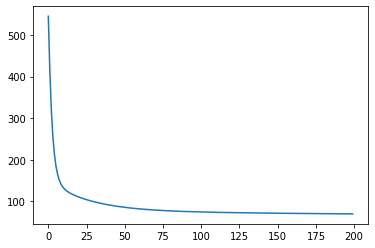

In [ ]:
X = df.values[:,:-1].astype(np.float)
Y = df.values[:,-1].astype(np.float)
print(X)

X = (X - X.mean())/X.std()



model = tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(13),
      tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.8), loss = 'mse')

def schedule(epoch, lr):
  if(epoch < 50):
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X,Y,epochs=200)
plt.plot(r.history['loss'])